# 01. Single neuron and linear regression

## 01.1 Create a function (single linear neuron) with some inputs and outputs

In [2]:
import numpy as np

# Define the true weights and bias for a single linear neuron
# (see also http://d2l.ai/chapter_linear-networks/linear-regression-scratch.html)
true_weights = np.array([2, -3.4])
true_bias = 4.2

# Create some inputs using a standard normal distribution
number_examples = 1000
number_features = len(true_weights)
true_inputs = np.random.normal(loc=0.0, scale=1.0, size=(number_examples, number_features))

# Create some noise for all the examples using a normal distribution
true_noise = np.random.normal(loc=0.0, scale=0.01, size=number_examples)
    
# Compute the true outputs using the inputs, and the true weights, bias, and noise
true_outputs = np.matmul(true_inputs, true_weights) + true_bias + true_noise

## 01.2. Learn the parameters of the neuron using gradient descent

In [3]:
# Define the training parameters
number_epochs = 10
batch_size = 10
learning_rate = 0.03

# Initialize the predicted weights and bias
predicted_weights = np.random.normal(loc=0.0, scale=0.01, size=number_features)
predicted_bias = 0

# Initialize the loss for all the batches
number_batches = int(np.ceil(number_examples/batch_size))
predicted_loss = np.zeros(number_batches)

# Loop over the epochs
for i in range(number_epochs):
    
    # Loop over the batches
    k = 0
    for j in range(0, number_examples, batch_size):
        
        # Derive the end index of the batch
        j2 = min(j+batch_size, number_examples)
    
        # Compute the predicted outputs using the inputs, and the predicted weights and bias
        predicted_outputs = np.matmul(true_inputs[j:j2, :], predicted_weights) + predicted_bias

        # Compute the difference between the predicted outputs and the true outputs
        difference_outputs = predicted_outputs-true_outputs[j:j2]

        # Compute the loss using the mean squared error
        predicted_loss[k] = np.mean(0.5*np.power(difference_outputs, 2))
        
        # Do not need to make the last updates after computing the last loss
        if i < number_epochs-1 or k < number_batches-1:
            
            # Update the predicted weights and bias using gradient descent, taking the derivative of the loss function
            predicted_weights = predicted_weights - learning_rate*np.mean(true_inputs[j:j2, :]*(difference_outputs)[:, np.newaxis], axis=0)
            predicted_bias = predicted_bias - learning_rate*np.mean(difference_outputs, axis=0)
            
        # Update the index
        k = k+1
    
    # Print the epoch and loss
    print(f"Epoch: {i}; loss: {np.mean(predicted_loss)}")
    
# Print the predicted weights and bias
print("")
print(f"Predicted weights: {predicted_weights}")
print(f"Predicted bias: {predicted_bias}")

Epoch: 0; loss: 2.8187449613365447
Epoch: 1; loss: 0.00444005752131122
Epoch: 2; loss: 5.732582490746924e-05
Epoch: 3; loss: 4.8618877003667355e-05
Epoch: 4; loss: 4.859391011249109e-05
Epoch: 5; loss: 4.8594487115079714e-05
Epoch: 6; loss: 4.8594568922580144e-05
Epoch: 7; loss: 4.859457582178277e-05
Epoch: 8; loss: 4.85945763265458e-05
Epoch: 9; loss: 4.859457636110966e-05

Predicted weights: [ 1.99959888 -3.39936834]
Predicted bias: 4.2001012991446665


## 01.3. Learn the parameters of the neuron using gradient descent in Keras

In [4]:
import tensorflow as tf

# Define the training parameters
number_epochs = 10
batch_size = 10
learning_rate = 0.03

# Initialize the model (as a feedforward NN)
model = tf.keras.Sequential()

# Add an input with the number of features
model.add(tf.keras.Input(shape=number_features))

# Add a densely-connected NN layer without activation and with initialized weights and bias
model.add(tf.keras.layers.Dense(1, activation=None, \
                                kernel_initializer=tf.initializers.RandomNormal(mean=0, stddev=0.01), \
                                bias_initializer="zeros"))

# Configure the model for training with gradient descent optimizer and mean squared error loss
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=learning_rate),
              loss="mean_squared_error")

# Train the model give the batch size and number of epochs
model.fit(x=true_inputs, y=true_outputs, batch_size=batch_size, epochs=number_epochs, verbose=1)

# Print the predicted weights and bias
print("")
print(f"Predicted weights: {model.get_weights()[0][:, 0]}")
print(f"Predicted bias: {model.get_weights()[1][0]}")

Epoch 1/10
100/100 [==============================] - 1s 6ms/step - loss: 2.8845
Epoch 2/10
100/100 [==============================] - 1s 5ms/step - loss: 1.0319e-04
Epoch 3/10
100/100 [==============================] - 1s 5ms/step - loss: 9.7579e-05
Epoch 4/10
100/100 [==============================] - 0s 4ms/step - loss: 9.7516e-05
Epoch 5/10
100/100 [==============================] - 1s 5ms/step - loss: 9.7059e-05
Epoch 6/10
100/100 [==============================] - 0s 5ms/step - loss: 9.7149e-05
Epoch 7/10
100/100 [==============================] - 0s 4ms/step - loss: 9.7932e-05
Epoch 8/10
100/100 [==============================] - 0s 4ms/step - loss: 9.6741e-05
Epoch 9/10
100/100 [==============================] - 0s 5ms/step - loss: 9.7278e-05
Epoch 10/10
100/100 [==============================] - 0s 5ms/step - loss: 9.7386e-05

Predicted weights: [ 2.0007517 -3.3995705]
Predicted bias: 4.200189113616943


## 01.4. Learn the parameters of the neuron using an evolutionary algorithm

In [5]:
# Define the training parameters
number_epochs = 10
batch_size = 10
number_individuals = 10
number_parents = 2
mutation_rate = 0.01

# Initialize the predicted weights and bias for all the individuals
predicted_weights = np.random.normal(loc=0.0, scale=0.01, size=(number_features, number_individuals))
predicted_bias = np.zeros((1, number_individuals))

# Initialize the loss for all the batches and for all the individuals
number_batches = int(np.ceil(number_examples/batch_size))
predicted_loss = np.zeros((number_batches, number_individuals))

# Loop over the epochs
for i in range(number_epochs):
    
    # Loop over the batches
    k = 0
    for j in range(0, number_examples, batch_size):
        
        # Derive the end index of the batch
        j2 = min(j+batch_size, number_examples)
    
        # Compute the predicted outputs using the inputs, and the predicted weights and bias, for every individual
        predicted_outputs = np.matmul(true_inputs[j:j2, :], predicted_weights) + predicted_bias

        # Compute the loss using the mean squared error, for every individual
        predicted_loss[k, :] = np.mean(np.power(predicted_outputs-true_outputs[j:j2, np.newaxis], 2), axis=0)
        
        # Do not need to make the last updates after computing the last loss
        if i < number_epochs-1 or k < number_batches-1:
        
            # Get the indices of the parents (the fittest individuals)
            parent_indices = np.argsort(predicted_loss[k, :])[0:number_parents]

            # Compute the mutation scale using the root mean square error
            mutation_scale = mutation_rate*np.mean(np.sqrt(predicted_loss[k, parent_indices]))
            
            # Update the predicted weights and bias using evolutionary algorithm, doing crossover and mutation
            predicted_weights = np.mean(predicted_weights[:, parent_indices], axis=1)[:, np.newaxis] \
            + np.random.normal(loc=0.0, scale=mutation_scale, size=(number_features, number_individuals))
            predicted_bias = np.mean(predicted_bias[:, parent_indices]) \
            + np.random.normal(loc=0.0, scale=mutation_scale, size=(1, number_individuals))
        
        # Update the index
        k = k+1
        
    # Print the epoch and loss
    print(f"Epoch: {i}; loss: {np.mean(predicted_loss)}")
    
# Print the predicted weights and bias
print("")
print(f"Predicted weights: {np.mean(predicted_weights, axis=1)}")
print(f"Predicted bias: {np.mean(predicted_bias)}")

Epoch: 0; loss: 12.661830007257883
Epoch: 1; loss: 1.0104751518427446
Epoch: 2; loss: 0.09509819209386038
Epoch: 3; loss: 0.00962225842075194
Epoch: 4; loss: 0.0008572161053691287
Epoch: 5; loss: 0.00014691579376888814
Epoch: 6; loss: 9.932332704636156e-05
Epoch: 7; loss: 9.769585989539751e-05
Epoch: 8; loss: 9.741643025748753e-05
Epoch: 9; loss: 9.774602530535614e-05

Predicted weights: [ 2.00004236 -3.40011122]
Predicted bias: 4.199815233515036


# 02. Single neuron and softmax regression

## 02.1. Prepare a dataset for a multiclass classification problem

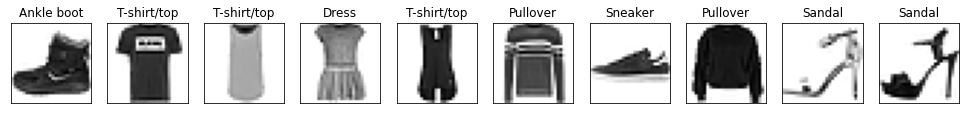

In [6]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# Import the fashion-MNIST dataset
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', \
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Show some of the data
plt.figure(figsize=(17, 10))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.title(class_names[train_labels[i]])
    plt.xticks([])
    plt.yticks([])
plt.show()

# Get the number of train and test examples and the sizes of the inputs and outputs
number_train = np.shape(train_images)[0]
number_test = np.shape(test_images)[0]
input_size = np.shape(train_images)[1]*np.shape(train_images)[2]
output_size = len(class_names)

# Reshape the inputs and normalize them
train_inputs = np.reshape(train_images, (number_train, input_size))
train_inputs = train_inputs/255
test_inputs = np.reshape(test_images, (number_test, input_size))
test_inputs = test_inputs/255

# Transform the outputs from label numbers to one-hot vectors
train_outputs = np.zeros((number_train, output_size))
for i in range(number_train):
    train_outputs[i, train_labels[i]] = 1
test_outputs = np.zeros((number_test, output_size))
for i in range(number_test):
    test_outputs[i, test_labels[i]] = 1

## 02.2. Learn the parameters of a neuron using gradient descent

In [7]:
# Define the training parameters
number_epochs = 10
batch_size = 256
learning_rate = 0.1

# Initialize the weights and biases
train_weights = np.random.normal(loc=0.0, scale=0.01, size=(input_size, output_size))
train_biases = np.zeros(output_size)

# Initialize the loss and the accuracy for all the batches
number_batches = int(np.ceil(number_train/batch_size))
train_loss = np.zeros(number_batches)
train_accuracy = np.zeros(number_batches)

# Loop over the epochs
for i in range(number_epochs):
    
    # Compute the predicted test outputs using the test inputs, and the learned weights and biases
    test_outputs2 = np.matmul(test_inputs, train_weights) + train_biases
    
    # Compute the conditional probabilities of each class using the softmax function
    # (modified to avoid numerical stability issues)
    test_outputs2 = test_outputs2-np.max(test_outputs2, axis=1)[:, np.newaxis]
    test_exp = np.exp(test_outputs2)
    test_softmax = test_exp/np.sum(test_exp, axis=1)[:, np.newaxis]
    
    # Compute the classification accuracy given the true test labels
    test_accuracy = np.mean(np.argmax(test_softmax, axis=1)==test_labels)
    
    # Loop over the batches
    k = 0
    for j in range(0, number_train, batch_size):
        
        # Derive the end index for the current batch
        j2 = min(j+batch_size, number_train)
    
        # Compute the predicted train outputs using the train inputs, and the learned weights and biases
        train_outputs2 = np.matmul(train_inputs[j:j2, :], train_weights) + train_biases
        
        # Compute the conditional probabilities of each class using the softmax function
        # (modified to avoid numerical stability issues)
        train_outputs2 = train_outputs2-np.max(train_outputs2, axis=1)[:, np.newaxis]
        train_exp = np.exp(train_outputs2)
        train_softmax = train_exp/np.sum(train_exp, axis=1)[:, np.newaxis]
        
        # Compute the cross-entropy loss given the true train outputs
        # (rewritten to avoid numerical stability issues)
#         train_loss[k] = np.mean(-np.sum(train_outputs[j:j2, :]*np.log(train_softmax), axis=1))
        train_loss[k] = np.mean(-np.sum(train_outputs[j:j2, :]\
                                        *(train_outputs2-np.log(np.sum(train_exp, axis=1)[:, np.newaxis])), axis=1))
        
        # Compute the classification accuracy given the true train labels
        train_accuracy[k] = np.mean(np.argmax(train_softmax, axis=1)==train_labels[j:j2])
        
        # Do not need to make the last updates after computing the last loss
        if i < number_epochs-1 or k < number_batches-1:
            
            # Compute the derivative of the loss function
            train_derivative = train_softmax-train_outputs[j:j2, :]
            
            # Update the weights and biases using gradient descent
            train_weights = train_weights-learning_rate*np.matmul(train_inputs[j:j2, :].T, train_derivative)/batch_size
            train_biases = train_biases-learning_rate*np.mean(train_derivative, axis=0)
            
        # Update the index
        k = k+1
        
    # Print the epoch and loss
    print(f"Epoch: {i}; train loss: {np.mean(train_loss)}; train accuracy: {np.mean(train_accuracy)}; test accuracy: {test_accuracy}")

Epoch: 0; train loss: 0.783849845366292; train accuracy: 0.7502105496453901; test accuracy: 0.0994
Epoch: 1; train loss: 0.5705786743002944; train accuracy: 0.8124722960992907; test accuracy: 0.7929
Epoch: 2; train loss: 0.5254992443085433; train accuracy: 0.825531914893617; test accuracy: 0.812
Epoch: 3; train loss: 0.501320580748791; train accuracy: 0.8318982712765958; test accuracy: 0.8198
Epoch: 4; train loss: 0.4854928799368877; train accuracy: 0.8365359042553191; test accuracy: 0.8256
Epoch: 5; train loss: 0.47403078019972594; train accuracy: 0.8402980939716311; test accuracy: 0.8283
Epoch: 6; train loss: 0.4652061092069018; train accuracy: 0.8425587322695035; test accuracy: 0.8296
Epoch: 7; train loss: 0.4581257534430963; train accuracy: 0.8447528812056737; test accuracy: 0.8323
Epoch: 8; train loss: 0.45227260297811916; train accuracy: 0.8465979609929077; test accuracy: 0.834
Epoch: 9; train loss: 0.4473226058631159; train accuracy: 0.847761524822695; test accuracy: 0.8352


## 02.3. Make predictions using the trained neuron

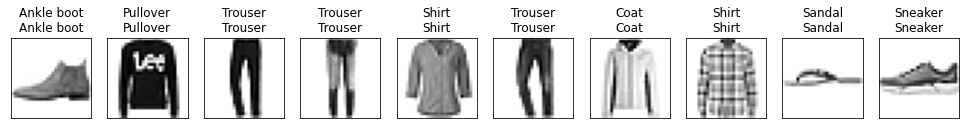

In [8]:
# Compute the predicted test outputs using the test inputs, and the learned weights and biases
test_outputs2 = np.matmul(test_inputs, train_weights) + train_biases

# Compute the conditional probabilities of each class using the softmax function
# (modified to avoid numerical stability issues)
test_outputs2 = test_outputs2-np.max(test_outputs2, axis=1)[:, np.newaxis]
test_exp = np.exp(test_outputs2)
test_softmax = test_exp/np.sum(test_exp, axis=1)[:, np.newaxis]

# Compute the predicted labels
test_labels2 = np.argmax(test_softmax, axis=1)

# Show the data with the true and predicted labels
plt.figure(figsize=(17, 10))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(test_images[i], cmap=plt.cm.binary)
    plt.title(class_names[test_labels[i]] + "\n" + class_names[test_labels2[i]])
    plt.xticks([])
    plt.yticks([])
plt.show()

## 02.4. Learn the parameters of a neuron using gradient descent in Keras

In [9]:
import tensorflow as tf

# Define the training parameters
number_epochs = 10
batch_size = 256
learning_rate = 0.1

# Initialize the model (as a feedforward NN)
model = tf.keras.Sequential()

# Add an input with the number of features
model.add(tf.keras.Input(shape=input_size))

# Add a densely-connected NN layer without activation and with initialized weights and bias
model.add(tf.keras.layers.Dense(output_size, activation=None, \
                                kernel_initializer=tf.initializers.RandomNormal(mean=0, stddev=0.01), \
                                bias_initializer="zeros"))

# Configure the model for training with gradient descent optimizer and cross-entropy loss
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=learning_rate), \
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True), \
              metrics=["accuracy"])

# Train the model give the batch size and number of epochs
model.fit(x=train_inputs, y=train_outputs, batch_size=batch_size, epochs=number_epochs, verbose=1)

Epoch 1/10
235/235 [==============================] - 0s 2ms/step - loss: 0.7857 - accuracy: 0.7513
Epoch 2/10
235/235 [==============================] - 1s 2ms/step - loss: 0.5696 - accuracy: 0.8141
Epoch 3/10
235/235 [==============================] - 1s 2ms/step - loss: 0.5250 - accuracy: 0.8262
Epoch 4/10
235/235 [==============================] - 1s 2ms/step - loss: 0.5014 - accuracy: 0.8323
Epoch 5/10
235/235 [==============================] - 1s 2ms/step - loss: 0.4853 - accuracy: 0.8368
Epoch 6/10
235/235 [==============================] - 1s 3ms/step - loss: 0.4741 - accuracy: 0.8402
Epoch 7/10
235/235 [==============================] - 1s 3ms/step - loss: 0.4650 - accuracy: 0.8424
Epoch 8/10
235/235 [==============================] - 1s 4ms/step - loss: 0.4579 - accuracy: 0.8443
Epoch 9/10
235/235 [==============================] - 1s 4ms/step - loss: 0.4524 - accuracy: 0.8471
Epoch 10/10
235/235 [==============================] - 1s 4ms/step - loss: 0.4478 - accuracy: 0.8481

## 02.5. Learn the parameters of a neuron using an EA

In [10]:
# Define the training parameters
number_epochs = 10
batch_size = 256
number_individuals = 10
number_parents = 2
mutation_rate = 0.01

# Initialize the weights and biases for all the individuals
train_weights = np.random.normal(loc=0.0, scale=0.01, size=(input_size, output_size, number_individuals))
train_biases = np.zeros((output_size, number_individuals))

# Initialize the loss and the accuracy for all the batches and for all the individuals
number_batches = int(np.ceil(number_train/batch_size))
train_loss = np.zeros((number_batches, number_individuals))
train_accuracy = np.zeros((number_batches, number_individuals))

# Loop over the epochs
for i in range(number_epochs):
    
    # Compute the predicted test outputs using the test inputs, and the learned weights and biases
    test_outputs2 = np.matmul(test_inputs, np.mean(train_weights, axis=2)) + np.mean(train_biases, axis=1)[np.newaxis, :]
    
    # Compute the conditional probabilities of each class using the softmax function
    # (modified to avoid numerical stability issues)
    test_outputs2 = test_outputs2-np.max(test_outputs2, axis=1)[:, np.newaxis]
    test_exp = np.exp(test_outputs2)
    test_softmax = test_exp/np.sum(test_exp, axis=1)[:, np.newaxis]
    
    # Compute the classification accuracy given the true test labels
    test_accuracy = np.mean(np.argmax(test_softmax, axis=1)==test_labels)
    
    # Loop over the batches
    k = 0
    for j in range(0, number_train, batch_size):
        
        # Derive the end index for the current batch
        j2 = min(j+batch_size, number_train)
    
        # Compute the predicted train outputs using the train inputs, and the learned weights and biases, for every individual
        train_outputs2 = np.tensordot(train_inputs[j:j2, :], train_weights, axes=(1,0)) + train_biases[np.newaxis, :, :]
        
        # Compute the conditional probabilities of each class using the softmax function
        # (modified to avoid numerical stability issues)
        train_outputs2 = train_outputs2-np.max(train_outputs2, axis=1)[:, np.newaxis, :]
        train_exp = np.exp(train_outputs2)
        train_softmax = train_exp/np.sum(train_exp, axis=1)[:, np.newaxis, :]
        
        # Compute the cross-entropy loss given the true train outputs
        # (rewritten to avoid numerical stability issues)
#         train_loss[k] = np.mean(-np.sum(train_outputs[j:j2, :, np.newaxis]*np.log(train_softmax), axis=1), axis=0)
        train_loss[k, :] = np.mean(-np.sum(train_outputs[j:j2, :, np.newaxis]\
                                        *(train_outputs2-np.log(np.sum(train_exp, axis=1)[:, np.newaxis, :])), axis=1), axis=0)
        
        # Compute the classification accuracy given the true train labels
        train_accuracy[k, :] = np.mean(np.argmax(train_softmax, axis=1) == train_labels[j:j2, np.newaxis], axis=0)
        
        # Do not need to make the last updates after computing the last loss
        if i < number_epochs-1 or k < number_batches-1:
            
            # Get the indices of the parents (the fittest individuals)
            parent_indices = np.argsort(train_loss[k, :])[0:number_parents]

            # Compute the mutation scale using the root mean square error
            mutation_scale = mutation_rate*np.mean(np.sqrt(train_loss[k, parent_indices]))
            
            # Update the weights and bias using EA, doing crossover and mutation
            train_weights = np.mean(train_weights[:, :, parent_indices], axis=2)[:, :, np.newaxis] \
            + np.random.normal(loc=0.0, scale=mutation_scale, size=(input_size, output_size, number_individuals))
            train_biases = np.mean(train_biases[:, parent_indices], axis=1)[:, np.newaxis] \
            + np.random.normal(loc=0.0, scale=mutation_scale, size=(output_size, number_individuals))
            
        # Update the index
        k = k+1
        
    # Print the epoch and loss
    print(f"Epoch: {i}; train loss: {np.mean(train_loss)}; train accuracy: {np.mean(train_accuracy)}; test accuracy: {test_accuracy}")

Epoch: 0; train loss: 1.3470855335429943; train accuracy: 0.5669592198581561; test accuracy: 0.0988
Epoch: 1; train loss: 0.897921679955183; train accuracy: 0.6882823581560283; test accuracy: 0.6619
Epoch: 2; train loss: 0.8054259166387707; train accuracy: 0.7202022384751774; test accuracy: 0.7042
Epoch: 3; train loss: 0.7674243615646735; train accuracy: 0.7321199024822694; test accuracy: 0.722
Epoch: 4; train loss: 0.755920666858345; train accuracy: 0.7354255319148936; test accuracy: 0.7274
Epoch: 5; train loss: 0.7345210322710556; train accuracy: 0.741724844858156; test accuracy: 0.7306
Epoch: 6; train loss: 0.7290635188717971; train accuracy: 0.7445578457446809; test accuracy: 0.7254
Epoch: 7; train loss: 0.7158512668676895; train accuracy: 0.7503928413120569; test accuracy: 0.7395
Epoch: 8; train loss: 0.7140320568739226; train accuracy: 0.7522429078014184; test accuracy: 0.7404
Epoch: 9; train loss: 0.7082026202447802; train accuracy: 0.7557629654255319; test accuracy: 0.7468
